# Swiggity Swooty @the PUBG Booty

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

%matplotlib inline

C:\Users\Jordan\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
training_data_filepath='C:/Users/Jordan/Desktop/PUBG Data/train.csv'
training=pd.read_csv(training_data_filepath)

# EDA

In [55]:
#Are any vectors missing values? Nope
training.isnull().values.any()

False

In [19]:
training.describe().round(2)
#var_list=list(training)
#for varz in var_list:
    #print(varz)
    #print(training[varz].describe().round(2))
    #print("\n")

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4357336.00,4357336.00,4357336.00,4357336.00,4357336.00,4357336.00,4357336.00,4357336.00,4357336.00,4357336.00,...,4357336.00,4357336.00,4357336.00,4357336.00,4357336.00,4357336.00,4357336.00,4357336.00,4357336.00,4357336.00
mean,3102678.01,1024776.56,23855.39,0.27,0.96,132.90,0.69,0.24,1.19,47.03,...,0.16,423.88,0.00,4.14,0.01,0.01,1055.12,3.46,1500.50,0.47
std,1797477.32,696719.69,13782.27,0.63,1.56,169.94,1.19,0.61,2.37,27.33,...,0.47,1222.93,0.06,27.57,0.13,0.07,1116.12,2.40,42.54,0.31
min,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,350.00,0.00
25%,1537745.75,474137.75,11914.00,0.00,0.00,0.00,0.00,0.00,0.00,23.00,...,0.00,0.00,0.00,0.00,0.00,0.00,133.40,2.00,1491.00,0.20
50%,3110605.50,943032.00,23837.00,0.00,0.00,87.76,0.00,0.00,0.00,47.00,...,0.00,0.00,0.00,0.00,0.00,0.00,573.20,3.00,1500.00,0.46
75%,4657295.25,1418544.00,35801.00,0.00,1.00,188.40,1.00,0.00,1.00,70.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1808.00,5.00,1510.00,0.74
max,6224522.00,2700605.00,47733.00,20.00,18.00,6384.00,63.00,26.00,59.00,100.00,...,41.00,48390.00,42.00,5286.00,6.00,5.00,17300.00,76.00,1923.00,1.00


# Correlation Between Variables
Higher positive correlation means value goes up as winPlacePerc does
Negative correlation means value goes up and winPlacePerc goes down (or lower values mean higher winPlacePerc)

In [ ]:
corr_matrix=training.corr(method='pearson')

In [12]:
print(corr_matrix['winPlacePerc'].sort_values()[:5])
print("\n")
print(corr_matrix['winPlacePerc'].sort_values()[-5:])

killPlace   -0.708314
Id          -0.018157
teamKills   -0.006122
groupId     -0.000239
matchId      0.000423
Name: winPlacePerc, dtype: float64


damageDealt        0.438552
weaponsAcquired    0.571521
boosts             0.618075
walkDistance       0.811857
winPlacePerc       1.000000
Name: winPlacePerc, dtype: float64


# Teams vs. Individual
winPlacePerc prediction is calculated by team as opposed to user, as seen below.

In [21]:
training[['Id','groupId','matchId','kills','winPlacePerc']][training["matchId"]==11914].sort_values(by='winPlacePerc').head(15)

,Id,groupId,matchId,kills,winPlacePerc
59648,80106,85707,11914,1,0.0000
107381,148296,85707,11914,1,0.0000
155114,216486,85707,11914,1,0.0000
2232439,3184380,85707,11914,0,0.0000
2045789,2917687,85707,11914,0,0.0000
2279061,3250996,85705,11914,0,0.0345
3207495,4577172,85705,11914,0,0.0345
631880,897598,85705,11914,0,0.0345
536770,761721,85705,11914,1,0.0345
584348,829690,85705,11914,1,0.0345


# Grouping Teams
This section creates averages from team data

In [40]:
var_list=list(training)
var_list.remove('Id')
var_list.remove('vehicleDestroys')
var_list.remove('longestKill')

#team_dataz=training[var_list].groupby('groupId').agg(['mean','count'])
team_stats=training[var_list].groupby('groupId').agg(['mean','count','sum'])

In [42]:
team_stats.round(2).stack().head(12)

matchId  assists  boosts  damageDealt  DBNOs  headshotKills  \
groupId                                                                      
1       mean         0     0.33    1.67       391.33   2.33           0.33   
        count        3     3.00    3.00         3.00   3.00           3.00   
        sum          0     1.00    5.00      1174.00   7.00           1.00   
2       mean         0     0.00    0.33        29.96   0.00           0.00   
        count        3     3.00    3.00         3.00   3.00           3.00   
        sum          0     0.00    1.00        89.87   0.00           0.00   
3       mean         0     1.00    2.00        19.54   0.00           0.00   
        count        1     1.00    1.00         1.00   1.00           1.00   
        sum          0     1.00    2.00        19.54   0.00           0.00   
4       mean         0     1.00    3.00       229.40   1.00           0.00   
        count        1     1.00    1.00         1.00   1.00           1.00   
        sum          0     1.00    3.00       229.40   1.00           0.00   

               heals  killPlace  killPoints  kills      ...       numGroups  \
groupId                                                 ...                   
1       mean    1.67      18.67     1220.00   4.33      ...              28   
        count   3.00       3.00        3.00   3.00      ...               3   
        sum     5.00      56.00     3660.00  13.00      ...              84   
2       mean    0.33      52.00     1137.67   0.00      ...              28   
        count   3.00       3.00        3.00   3.00      ...               3   
        sum     1.00     156.00     3413.00   0.00      ...              84   
3       mean   10.00      54.00     1000.00   0.00      ...              28   
        count   1.00       1.00        1.00   1.00      ...               1   
        sum    10.00      54.00     1000.00   0.00      ...              28   
4       mean    2.00      55.00     1229.00   0.00      ...              28   
        count   1.00       1.00        1.00   1.00      ...               1   
        sum     2.00      55.00     1229.00   0.00      ...              28   

               revives  rideDistance  roadKills  swimDistance  teamKills  \
groupId                                                                    
1       mean      0.33           0.0        0.0          0.00        0.0   
        count     3.00           3.0        3.0          3.00        3.0   
        sum       1.00           0.0        0.0          0.00        0.0   
2       mean      0.00           0.0        0.0          5.37        0.0   
        count     3.00           3.0        3.0          3.00        3.0   
        sum       0.00           0.0        0.0         16.11        0.0   
3       mean      0.00         826.4        0.0          0.00        0.0   
        count     1.00           1.0        1.0          1.00        1.0   
        sum       0.00         826.4        0.0          0.00        0.0   
4       mean      0.00           0.0        0.0          0.00        0.0   
        count     1.00           1.0        1.0          1.00        1.0   
        sum       0.00           0.0        0.0          0.00        0.0   

               walkDistance  weaponsAcquired  winPoints  winPlacePerc  
groupId                                                                
1       mean        3026.33             4.67    1505.00          1.00  
        count          3.00             3.00       3.00          3.00  
        sum         9079.00            14.00    4515.00          3.00  
2       mean        1233.93             4.67    1510.33          0.68  
        count          3.00             3.00       3.00          3.00  
        sum         3701.80            14.00    4531.00          2.04  
3       mean        1856.00             6.00    1500.00          0.64  
        count          1.00             1.00       1.00          1.00  
        sum         1856.00   

# Kills

(array([ 2464072.,   916170.,   465632.,   229589.,   122488.,    65929.,
           37406.,    21820.,    12941.,     7809.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

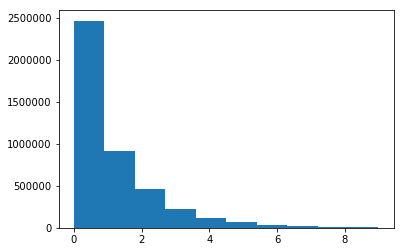

In [7]:
plt.hist(training['kills'][training['kills']<10])

In [35]:
print(corr_matrix['kills'].sort_values()[:5])
print("\n")
print(corr_matrix['kills'].sort_values()[-5:])

killPlace   -0.728624
Id          -0.031724
maxPlace    -0.010540
numGroups   -0.010505
groupId      0.000635
Name: kills, dtype: float64


headshotKills    0.683723
DBNOs            0.754374
killStreaks      0.804827
damageDealt      0.886165
kills            1.000000
Name: kills, dtype: float64


# Rankings

In [36]:
ranked_values=training[['kills','winPlacePerc','killPlace','winPoints','maxPlace']].sort_values(by=['winPlacePerc','killPlace'])
ranked_values.head()

,kills,winPlacePerc,killPlace,winPoints,maxPlace
14642,15,0.0,1,1500,5
38698,15,0.0,1,1500,3
325224,0,-0.0,1,1500,0
381369,27,0.0,1,1500,3
527599,5,0.0,1,1500,2


# Winner Winner
Values with winPlacePerc > .9

In [38]:
winner_winner=training[training['winPlacePerc']>=.9][['kills','winPlacePerc','killPlace','winPoints','maxPlace','walkDistance','rideDistance','swimDistance']].sort_values(by=['winPlacePerc','killPlace','maxPlace'])
winner_winner['distTravelled']=winner_winner['walkDistance']+winner_winner['swimDistance']+winner_winner['rideDistance']

winner_winner=winner_winner.drop(['swimDistance','rideDistance'],axis=1)

In [39]:
winner_winner.head()

,kills,winPlacePerc,killPlace,winPoints,maxPlace,walkDistance,distTravelled
33016,3,0.9,1,1628,11,2606.0,6728.0
80923,2,0.9,1,1500,11,3572.0,3572.0
120267,6,0.9,1,1500,11,2995.0,6106.0
156292,18,0.9,1,1500,11,0.0,0.0
392663,17,0.9,1,1500,11,192.4,192.4


# Simple OLS and logit reg modeling

In [64]:
def reg(dataz,model_type,equation):
    if model_type=="ols":
        results = smf.ols(equation,data=dataz).fit(cov_type="HC0")
    elif model_type=="logit":
        results = smf.logit(equation,data=dataz).fit()
    print(results.summary())
    
reg(training,"ols","winPlacePerc ~ walkDistance + kills + winPoints + heals + DBNOs")

                            OLS Regression Results                            
Dep. Variable:           winPlacePerc   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                 1.018e+06
Date:                Thu, 11 Oct 2018   Prob (F-statistic):               0.00
Time:                        20:38:58   Log-Likelihood:             1.4474e+06
No. Observations:             4357336   AIC:                        -2.895e+06
Df Residuals:                 4357330   BIC:                        -2.895e+06
Df Model:                           5                                         
Covariance Type:                  HC0                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3270      0.003   -124.108   